#### 資料清理

In [53]:
import pandas as pd
normal=pd.read_csv("../resource/無聽力減退(0725).csv")
normal=normal.iloc[1::,:]

c:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,152,153,154,155,156,157,158,159,160,161,163,164,165,166) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [54]:
tumor=pd.read_csv("../resource/有聽力減退(0725).csv")
tumor=tumor.iloc[1::,:]

c:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,152,153,154,155,156,157,158,159,161,163,164,165) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
# Training Set (有聽力減退)
print(tumor.shape)

# Control Set (無聽力減退)
print(normal.shape)

(5603, 167)
(12400, 167)


In [56]:
tumor['SEX']=tumor['SEX'].astype(int)
normal['SEX']=normal['SEX'].astype(int)

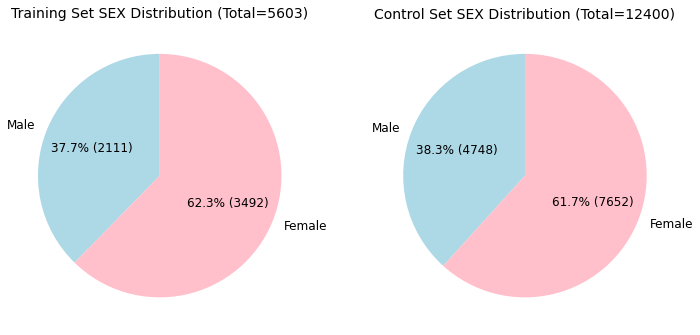

In [57]:
import matplotlib.pyplot as plt
import numpy as np

tumor_counts = tumor['SEX'].value_counts(normalize=True).sort_index() * 100
normal_counts = normal['SEX'].value_counts(normalize=True).sort_index() * 100
tumor_samples = tumor['SEX'].value_counts().sort_index()
normal_samples = normal['SEX'].value_counts().sort_index()

all_sex_values = sorted(set(tumor_counts.index).union(normal_counts.index))
tumor_counts = tumor_counts.reindex(all_sex_values, fill_value=0)
normal_counts = normal_counts.reindex(all_sex_values, fill_value=0)
tumor_samples = tumor_samples.reindex(all_sex_values, fill_value=0)
normal_samples = normal_samples.reindex(all_sex_values, fill_value=0)

labels = ['Male', 'Female']

def autopct_format(pct, allvalues):
    absolute = int(np.round(pct/100.*np.sum(allvalues)))
    return "{:.1f}% ({:d})".format(pct, absolute)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(tumor_counts, labels=labels, autopct=lambda pct: autopct_format(pct, tumor_samples), startangle=90, colors=['lightblue', 'pink'], textprops={'fontsize': 12})
plt.title(f'Training Set SEX Distribution (Total={tumor.shape[0]})',fontsize=14)

plt.subplot(1, 2, 2)
plt.pie(normal_counts, labels=labels, autopct=lambda pct: autopct_format(pct, normal_samples), startangle=90, colors=['lightblue', 'pink'], textprops={'fontsize': 12})
plt.title(f'Control Set SEX Distribution (Total={normal.shape[0]})',fontsize=14)

plt.show()


In [58]:
tumor['SEX']=tumor['SEX'].astype(str)
normal['SEX']=normal['SEX'].astype(str)

In [59]:
# 區分Training / Control Set 男女檔案
def filter_femaleinfo(df):
    columns_to_drop = ['DYSMENORRHEA','MENARCHE', 'MENSTRURATION_CURR', 'MENOPAUSE', 'HORMOME_MED', 'HOMO_2_YR', 'HOMO_2_MN', 'UTERINE_CA', 'CERVICAL_CA', 'OVARIAN_CA']
    df = df.drop(columns=columns_to_drop)
    return df

def reindex(df):
    # 將 I_32 從原位置移除並添加到最後
    all_columns = list(df.columns)
    columns_to_move = ['I_32']
    new_columns = [col for col in all_columns if col not in columns_to_move] + columns_to_move
    df = df[new_columns]
    return df


# Training Set
tumor_male=tumor[tumor['SEX']=='1'] #Male
tumor_female=tumor[tumor['SEX']=='2'] #Female
tumor_male=filter_femaleinfo(tumor_male)
tumor_male=reindex(tumor_male)
tumor_female=reindex(tumor_female)

# Contol Set
normal_male=normal[normal['SEX']=='1'] #Male
normal_female=normal[normal['SEX']=='2'] #Female
normal_male=filter_femaleinfo(normal_male)
normal_male=reindex(normal_male)
normal_female=reindex(normal_female)
normal_female.shape

(7652, 167)

In [60]:
# 計算空值比例
def cal_nan(df):
    missing_values_count = df.isnull().sum()

    missing_values_ratio = (df.isnull().mean() * 100).round(2)

    missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_ratio}).sort_values(by='Missing Values', ascending=False)

    return missing_values_summary
cal_nan(normal_female)
cal_nan(normal_male)
cal_nan(tumor_female)
cal_nan(tumor_male)

,Missing Values,Percentage
C_HVY_SMK_YR,1925,91.19
DRK_CURR_TIME,1834,86.88
TWB2_ID,1423,67.41
SMK_CURR,1245,58.98
JOB_LGST_OCCUPATION,412,19.52
...,...,...
I_19,0,0.00
I_18,0,0.00
I_17,0,0.00
I_16,0,0.00


In [61]:
#將高比例缺失欄位刪除
normal_male = normal_male.drop(columns=['C_HVY_SMK_YR','DRK_CURR_TIME','SMK_CURR'])
tumor_male = tumor_male.drop(columns=['C_HVY_SMK_YR','DRK_CURR_TIME','SMK_CURR'])
normal_female = normal_female.drop(columns=['C_HVY_SMK_YR','DRK_CURR_TIME','SMK_CURR','HOMO_2_MN','HOMO_2_YR'])
tumor_female = tumor_female.drop(columns=['C_HVY_SMK_YR','DRK_CURR_TIME','SMK_CURR','HOMO_2_MN','HOMO_2_YR'])

In [62]:
# 欄位處理
def check_data_format(df_data, label_value):
    print("原始資料:" + str(df_data.shape))
    # 生活習慣，空值刪除
    df_data = df_data.dropna(subset=["AGE", "SEX", "DRK", "NUT_EXPERIENCE", "JOB_LGST_OCCUPATION","SPO_HABIT"])
    print("刪除生活習慣空值後剩餘:" + str(df_data.shape))
    # 疾病史，空值刪除
    df_data = df_data.dropna(subset=["ORTHOPEDICS_ARTICULUS", "OSTEOPOROSIS", "ARTHRITIS", "GOUT", "LUNG_RESPIRATORY",
                                     "ASTHMA", "EMPHYSEMA_BRONCHITIS", "HEART_BLOOD_TUBE", "VALVE_HEART_DIS", "CORONARY_ARTERY_DIS",
                                     "ARRHYTHMIA", "CARDIOMYOPATHY", "CONGENITAL_HEART_DIS", "OTHER_HEART_DIS", "HYPERLIPIDEMIA",
                                     "HYPERTENSION", "APOPLEXIA", "DIABETES", "ALIMENTARY_CANAL", "PEPTIC_ULCER",
                                     "GASTROESOPHAGEA_REFLUX", "IRRITABLE_BOWEL_SND", "PSYCHOSIS", "DEPRESSION", "MANIC_DEPRESSION",
                                     "POSTPARTUM_DEPRESSION", "OBSESSIVE_COMPULSIVE_DIS", "ALCOHOLISM_DRUG_ABUSE", "SCHIZOPHRENIA", "NERVOUS_SYSTEM",
                                     "EPILEPSY", "HEMICRANIA", "MULTIPLE_SCLEROSIS", "PARKISON", "DEMENTIA",
                                     "LIVER_GALL_STONE", "KIDNEY_STONE", "RENAL_FAILURE", "VERTIGO",
                                     "CARCINOMA_IN_SITU", "LIVER_CA", "LUNG_CA", "BREAST_CA", "GASTRIC_CA",
                                     "COLORECTAL_CA", "NASOPHARYNGEAL_CA", "PROSTATE_CA", "OTHER_CA", "ARTICULUS_ACHE", "NECK_ACHE",
                                     "BACK_AND_WAIST_ACHE", "SICATICA", "HEADACHE_AND_HEMICRANIA", "EYE_DIS",
                                     "CATARACT", "GLAUCOMA", "XEROPHTHALMIA", "RENTINAL_DETACHMENT", "FLOATERS",
                                     "BLIND", "COLOR_BLIND", "OTHER_EYE_DIS"])
    print("刪除疾病史空值後剩餘:" + str(df_data.shape))

    if df_data['SEX'].mode()[0]=='2':
        # 疾病史(有無經痛)，若無資料刪除
        df_data = df_data.dropna(subset=["DYSMENORRHEA"],how='any')
        
        # 女性生理狀況，若無資料刪除
        df_data = df_data.dropna(subset=["MENSTRURATION_CURR", "HORMOME_MED", "UTERINE_CA", "CERVICAL_CA", "OVARIAN_CA"], how='any')
        # 女性生理狀況: 停經年齡 (1)已停經:無資料刪除
        df_data = df_data[~((df_data['MENSTRURATION_CURR'] == '1') & (df_data['MENOPAUSE'].isna()))]
        print("刪除女性生理狀況之類別資料空值後剩餘:" + str(df_data.shape))

        # 女性生理狀況: 初經年齡空值補眾數
        MENARCHE_mode = df_data['MENARCHE'].mode()[0]
        df_data.loc[:, 'MENARCHE'] = df_data.apply(
            lambda row: MENARCHE_mode if pd.isna(row['MENARCHE']) else row['MENARCHE'],
            axis=1
        )

         # 女性相關問題:新增欄位"過去及至今月經期間"，(1)已停經:停經年齡-初經年齡(2)未停經:現在年齡-初經年齡
        insert_index = df_data.columns.get_loc("MENOPAUSE")
        df_data.insert(insert_index, "MC_DURATION",True)
        df_data['MC_DURATION'] = df_data.apply(
            lambda row: int(row['MENOPAUSE'])-int(row['MENARCHE']) if row['MENSTRURATION_CURR'] == '1' else int(row['AGE'])-int(row['MENARCHE']),
            axis=1
        )
        df_data = df_data.drop(columns=['MENOPAUSE'])

    # 中醫問診資料，空值刪除
    df_data = df_data.dropna(subset=['I_0', 'I_1', 'I_2', 'I_3', 'I_4', 'I_5', 'I_6', 'I_7', 'I_8',
                                       'I_9', 'I_10', 'I_11', 'I_12', 'I_13', 'I_14', 'I_15', 'I_16',
                                       'I_17', 'I_18', 'I_19', 'I_20', 'I_21', 'I_22', 'I_23', 'I_24',
                                        'I_25', 'I_26', 'I_27', 'I_28', 'I_29', 'I_30', 'I_31', 'I_32',
                                        'I_33', 'I_34', 'I_35', 'I_36', 'I_37', 'I_38', 'I_39', 'I_40',
                                        'I_41', 'I_42', 'I_43', 'I_44'])
    print("刪除中醫問診之類別資料空值後剩餘:" + str(df_data.shape))

    # 身體檢測資料，空值刪除
    df_data = df_data.dropna(subset=["BODY_HEIGHT", "BODY_WEIGHT", "BMI", "BODY_WAISTLINE", "BODY_BUTTOCKS",
                                     "BODY_FAT_RATE", "RBC", "WBC", "PLATELET", "HB", "HCT", "HBA1C", "ANTI_HCV_AB_1",
                                     "HBSAG_1", "HBEAG_1", "ANTI_HBS_AB_1", "ANTI_HBC_AB_1", "FASTING_GLUCOSE", "T_CHO",
                                     "TG", "HDL_C", "LDL_C", "T_BILIRUBIN", "ALBUMIN", "SGOT", "SGPT", "GAMMA_GT", "AFP",
                                     "BUN", "CREATININE", "URIC_ACID", "MICROALB","T_SCORE"])
    print("刪除身體檢測之類別資料空值後剩餘:" + str(df_data.shape))

    # 平均收縮壓、舒張壓、心跳，新增欄位取平均
    insert_index = df_data.columns.get_loc("BODY_BUTTOCKS") + 1
    df_data.insert(insert_index, "SIT_SYSTOLIC_PRESSURE_AVERAGE", True)
    df_data.loc[:, 'SIT_SYSTOLIC_PRESSURE_AVERAGE'] = (df_data['SIT_1_SYSTOLIC_PRESSURE'].astype(float) + df_data['SIT_2_SYSTOLIC_PRESSURE'].astype(float)) / 2

    df_data.insert(insert_index + 1, "SIT_DIASTOLIC_PRESSURE_AVERAGE", True)
    df_data.loc[:, 'SIT_DIASTOLIC_PRESSURE_AVERAGE'] = (df_data['SIT_1_DIASTOLIC_PRESSURE'].astype(float) + df_data['SIT_2_DIASTOLIC_PRESSURE'].astype(float)) / 2

    df_data.insert(insert_index + 2, "SIT_HEARTBEAT_SPEED_AVERAGE", True)
    df_data.loc[:, 'SIT_HEARTBEAT_SPEED_AVERAGE'] = (df_data['SIT_1_HEARTBEAT_SPEED'].astype(float) + df_data['SIT_2_HEARTBEAT_SPEED'].astype(float)) / 2

    # 醣化血色素值，<3.8用0取代
    df_data['HBA1C'].replace(['<3.8', '0'], inplace=True)

    # C型肝炎抗體、B型肝炎表面抗原、B型肝炎e抗原、B型肝炎表面抗體、B型肝炎核心抗體，文字代換成數字
    df_data['ANTI_HCV_AB_1'].replace({'Negative': 0, 'Nonreactive': 0, 'Weakly positive': 1, 'Reactive': 2, 'Positive': 2, 'Equivocal': 3}, inplace=True)
    df_data['HBSAG_1'].replace({'Negative': 0, 'Nonreactive': 0, 'Weakly': 1, 'Reactive': 2, 'Positive': 2, 'Equivocal': 3}, inplace=True)
    df_data['HBEAG_1'].replace({'Negative': 0, 'Nonreactive': 0, 'Reactive': 2, 'Positive': 2, 'Equivocal': 3}, inplace=True)
    df_data['ANTI_HBS_AB_1'].replace({'Negative': 0, 'Nonreactive': 0, 'Weakly': 1, 'Weakly positive': 1, 'Reactive': 2, 'Positive': 2, 'Equivocal': 3}, inplace=True)
    df_data['ANTI_HBC_AB_1'].replace({'Negative': 0, 'Nonreactive': 0, 'Reactive': 2, 'Positive': 2, 'Equivocal': 3}, inplace=True)

    # 血清麩胺酸苯醋酸轉氨基酶，<6用0取代
    df_data['SGOT'].replace(['<6', '0'], inplace=True)

    # 血清麩胺酸丙酮酸轉氨基酶，<5/<6用0取代
    df_data['SGPT'].replace(['<5', '<6'], ['0', '0'], inplace=True)

    # γ －麩胺醯轉移酶，<3.3用0取代
    df_data['GAMMA_GT'].replace(['<3.3', '0'], inplace=True)

    # 甲型胎兒血清蛋白，<2用0取代
    df_data['AFP'].replace(['< 2.00', '<2.00', '<2', '<2.0'], ['0', '0', '0', '0'], inplace=True)

    # 尿中微蛋白，<2 用0取代/<2.09 用2取代/<2.15 用2取代/<2.16 用2取代/<2.2 用2取代/<7 用6取代
    df_data['MICROALB'].replace(['<2', '0'], inplace=True)
    df_data['MICROALB'].replace(['<2.09', '<2.15', '<2.16', '<2.2'], ['2', '2', '2', '2'], inplace=True)
    df_data['MICROALB'].replace(['<7', '6'], inplace=True)
    df_data['MICROALB'].replace(['1,060','1,070','1,140','1,150','1,180','1,330','1,380','1,430',
                                 '1,520','1,560','1,620','1,690','1,740','1,790','2,050','2,090',
                                 '2,110','2,320','2,460','2,530','2,610','2,960','3,380','3,680',
                                 '3,910','3,980','4,690','5,580','7,470', '10,300','32,500','14,600'],
                                 ['1060','1070','1140','1150','1180','1330','1380','1430',
                                 '1520','1560','1620','1690','1740','1790','2050','2090',
                                 '2110','2320','2460','2530','2610','2960','3380','3680',
                                 '3910','3980','4690','5580','7470', '10300','32500','14600'], inplace=True)

    # 新增label
    insert_index = df_data.columns.get_loc("I_32") + 1
    df_data.insert(insert_index, "Label", True)
    df_data.loc[:, 'Label'] = label_value
    print("最終樣本數:" + str(df_data.shape))

    return df_data

In [63]:
normal_female = check_data_format(normal_female, '0')
normal_male = check_data_format(normal_male, '0')
tumor_female = check_data_format(tumor_female, '1')
tumor_male = check_data_format(tumor_male, '1')

原始資料:(7652, 162)
刪除生活習慣空值後剩餘:(6252, 162)
刪除疾病史空值後剩餘:(6088, 162)
刪除女性生理狀況之類別資料空值後剩餘:(5986, 162)
刪除中醫問診之類別資料空值後剩餘:(5984, 162)
刪除身體檢測之類別資料空值後剩餘:(4588, 162)
最終樣本數:(4588, 166)
原始資料:(4748, 154)
刪除生活習慣空值後剩餘:(3722, 154)
刪除疾病史空值後剩餘:(3640, 154)
刪除中醫問診之類別資料空值後剩餘:(3638, 154)
刪除身體檢測之類別資料空值後剩餘:(2774, 154)
最終樣本數:(2774, 158)
原始資料:(3492, 162)
刪除生活習慣空值後剩餘:(2838, 162)
刪除疾病史空值後剩餘:(2737, 162)
刪除女性生理狀況之類別資料空值後剩餘:(2643, 162)
刪除中醫問診之類別資料空值後剩餘:(2642, 162)
刪除身體檢測之類別資料空值後剩餘:(2099, 162)
最終樣本數:(2099, 166)
原始資料:(2111, 154)
刪除生活習慣空值後剩餘:(1698, 154)
刪除疾病史空值後剩餘:(1659, 154)
刪除中醫問診之類別資料空值後剩餘:(1658, 154)
刪除身體檢測之類別資料空值後剩餘:(1316, 154)
最終樣本數:(1316, 158)


In [64]:
def clean_data_female(data):
    data.iloc[:,1:121] = data.iloc[:,1:121].astype(float)
    data.iloc[:,122:-2] = data.iloc[:,122:-2].astype(float)
    data.iloc[:,-2:] = data.iloc[:,-2:].astype(int)
    
    return data

def clean_data_male(data):
    data.iloc[:,1:113] = data.iloc[:,1:113].astype(float)
    data.iloc[:,114:-2] = data.iloc[:,114:-2].astype(float)
    data.iloc[:,-2:] = data.iloc[:,-2:].astype(int)

    return data

normal_female = clean_data_female(normal_female)
tumor_female = clean_data_female(tumor_female)
normal_male = clean_data_male(normal_male)
tumor_male = clean_data_male(tumor_male)

In [65]:
normal_female.to_csv("../result/Control_Female.csv",index=False)
normal_male.to_csv("../result/Control_Male.csv",index=False)
tumor_female.to_csv("../result/Training_Female.csv",index=False)
tumor_male.to_csv("../result/Training_Male.csv",index=False)

In [66]:
normal = pd.concat([normal_female, normal_male], ignore_index=True)
normal = normal.drop(columns=['DYSMENORRHEA','MENARCHE','MENSTRURATION_CURR','MC_DURATION','HORMOME_MED','UTERINE_CA','CERVICAL_CA','OVARIAN_CA'])

tumor = pd.concat([tumor_female, tumor_male], ignore_index=True)
tumor = tumor.drop(columns=['DYSMENORRHEA','MENARCHE','MENSTRURATION_CURR','MC_DURATION','HORMOME_MED','UTERINE_CA','CERVICAL_CA','OVARIAN_CA'])

In [67]:
normal.to_csv("../result/Control.csv",index=False)
tumor.to_csv("../result/Training.csv",index=False)

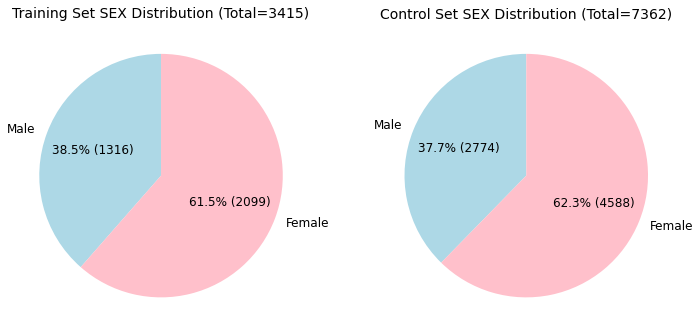

In [68]:
import matplotlib.pyplot as plt
import numpy as np

tumor_counts = tumor['SEX'].value_counts(normalize=True).sort_index() * 100
normal_counts = normal['SEX'].value_counts(normalize=True).sort_index() * 100
tumor_samples = tumor['SEX'].value_counts().sort_index()
normal_samples = normal['SEX'].value_counts().sort_index()

all_sex_values = sorted(set(tumor_counts.index).union(normal_counts.index))
tumor_counts = tumor_counts.reindex(all_sex_values, fill_value=0)
normal_counts = normal_counts.reindex(all_sex_values, fill_value=0)
tumor_samples = tumor_samples.reindex(all_sex_values, fill_value=0)
normal_samples = normal_samples.reindex(all_sex_values, fill_value=0)

labels = ['Male', 'Female']

def autopct_format(pct, allvalues):
    absolute = int(np.round(pct/100.*np.sum(allvalues)))
    return "{:.1f}% ({:d})".format(pct, absolute)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(tumor_counts, labels=labels, autopct=lambda pct: autopct_format(pct, tumor_samples), startangle=90, colors=['lightblue', 'pink'], textprops={'fontsize': 12})
plt.title(f'Training Set SEX Distribution (Total={tumor.shape[0]})',fontsize=14)

plt.subplot(1, 2, 2)
plt.pie(normal_counts, labels=labels, autopct=lambda pct: autopct_format(pct, normal_samples), startangle=90, colors=['lightblue', 'pink'], textprops={'fontsize': 12})
plt.title(f'Control Set SEX Distribution (Total={normal.shape[0]})',fontsize=14)

plt.show()


In [69]:
print(normal.shape)
print(tumor.shape)

(7362, 158)
(3415, 158)


In [70]:
normal=pd.read_csv("../result/Control.csv")
tumor=pd.read_csv("../result/Training.csv")